
# Juan Felipe Osorio Franco


# Ejercicio 1

Demuestre el resultado de la expresión de la frontera de decisión para el clasificador Bayesiano mediante Gaussiana multivariada (Ver [documento de apoyo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion/otros/clasificadoresBayes.pdf)).

  La regla de decisión de Bayes asigna una muestra $\mathbf{x}$ a la clase $A$ si:

  $$
  P(A \mid \mathbf{x}) > P(B \mid \mathbf{x}).
  $$

  Aplicando el teorema de Bayes:

  $$
  P(A \mid \mathbf{x}) = \frac{P(\mathbf{x} \mid A) P(A)}{P(\mathbf{x})}.
  $$

  Dado que $P(\mathbf{x})$ es común a ambas clases, la regla se simplifica a:

  $$
  P(\mathbf{x} \mid A) P(A) > P(\mathbf{x} \mid B) P(B).
  $$

  Tomamos el logaritmo natural en ambos lados de la desigualdad:

  $$
  \ln P(\mathbf{x} \mid A) + \ln P(A) > \ln P(\mathbf{x} \mid B) + \ln P(B).
  $$

  Reordenando los términos:

  $$
  \ln P(\mathbf{x} \mid A) - \ln P(\mathbf{x} \mid B) + \ln P(A) - \ln P(B) > 0.
  $$


  Las verosimilitudes están modeladas como Gaussianas multivariadas:

  $$
  P(\mathbf{x} \mid A) = \frac{1}{(2\pi)^{P/2} |\boldsymbol{\Sigma}_A|^{1/2}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_A)^\top \boldsymbol{\Sigma}_A^{-1} (\mathbf{x} - \boldsymbol{\mu}_A) \right),
  $$

  $$
  P(\mathbf{x} \mid B) = \frac{1}{(2\pi)^{P/2} |\boldsymbol{\Sigma}_B|^{1/2}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_B)^\top \boldsymbol{\Sigma}_B^{-1} (\mathbf{x} - \boldsymbol{\mu}_B) \right).
  $$


  Calculamos $\ln P(\mathbf{x} \mid A) - \ln P(\mathbf{x} \mid B)$:

  $$
  \begin{align*}
  \ln P(\mathbf{x} \mid A) - \ln P(\mathbf{x} \mid B) &= \left( -\frac{P}{2} \ln(2\pi) - \frac{1}{2} \ln |\boldsymbol{\Sigma}_A| - \frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_A)^\top \boldsymbol{\Sigma}_A^{-1} (\mathbf{x} - \boldsymbol{\mu}_A) \right) \\
  &\quad - \left( -\frac{P}{2} \ln(2\pi) - \frac{1}{2} \ln |\boldsymbol{\Sigma}_B| - \frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_B)^\top \boldsymbol{\Sigma}_B^{-1} (\mathbf{x} - \boldsymbol{\mu}_B) \right) \\
  &= -\frac{1}{2} \left( \ln |\boldsymbol{\Sigma}_A| - \ln |\boldsymbol{\Sigma}_B| \right) \\
  &\quad - \frac{1}{2} \left( (\mathbf{x} - \boldsymbol{\mu}_A)^\top \boldsymbol{\Sigma}_A^{-1} (\mathbf{x} - \boldsymbol{\mu}_A) - (\mathbf{x} - \boldsymbol{\mu}_B)^\top \boldsymbol{\Sigma}_B^{-1} (\mathbf{x} - \boldsymbol{\mu}_B) \right).
  \end{align*}
  $$

  *Nota:* Los términos $-\frac{P}{2} \ln(2\pi)$ se cancelan.


  Sustituyendo en la desigualdad y definiendo la función de decisión $f(\mathbf{x})$:

  $$
  f(\mathbf{x}) = \frac{1}{2} \left( (\mathbf{x} - \boldsymbol{\mu}_B)^\top \boldsymbol{\Sigma}_B^{-1} (\mathbf{x} - \boldsymbol{\mu}_B) - (\mathbf{x} - \boldsymbol{\mu}_A)^\top \boldsymbol{\Sigma}_A^{-1} (\mathbf{x} - \boldsymbol{\mu}_A) + \ln |\boldsymbol{\Sigma}_B| - \ln |\boldsymbol{\Sigma}_A| \right) \\
  + \ln P(A) - \ln P(B).
  $$



# Ejercicio 2

- Grafique las matrices de covarianza estimadas por clasificador y discuta sobre las colinealidades encontradas (ver método `covariance_`).

- Cómo puede mitigarse el mal condicionamiento de las matrices de covarianza en el cálculo de las distancias de Mahalanobis?. Ver regularizador del clasificador.



Número de condición matriz covarianza clase -1: 5.88
Número de condición matriz covarianza clase 1: 3.04

Efecto de la regularización en el número de condición:
reg_param=0.0: Clase -1=5.88, Clase 1=3.04
reg_param=0.1: Clase -1=4.98, Clase 1=2.89
reg_param=0.5: Clase -1=2.61, Clase 1=2.18
reg_param=1.0: Clase -1=1.00, Clase 1=1.00


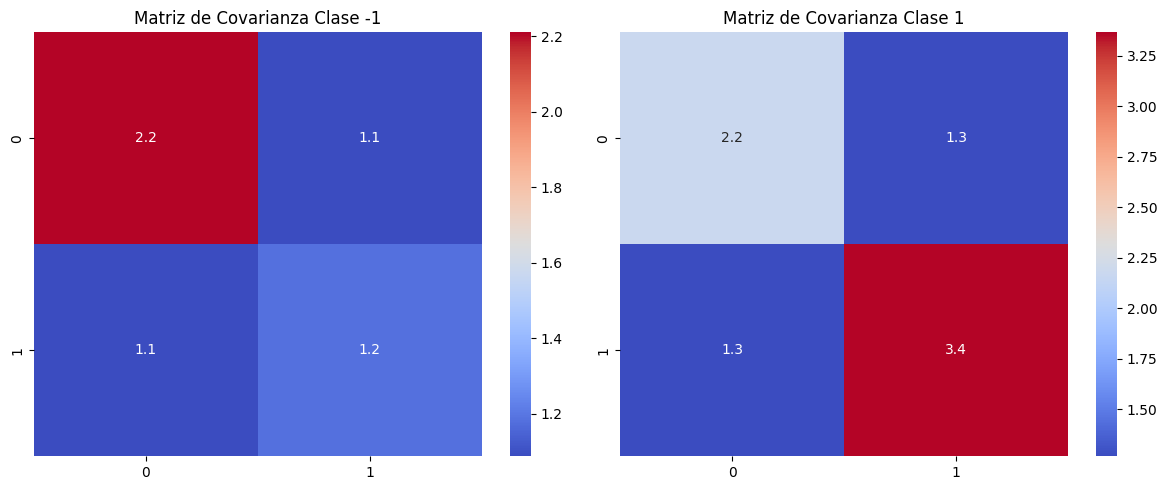

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Recrear los datos del ejemplo
mu1 = np.array([-3,-2])
mu2 = np.array([0,2])
Sigma1 = np.array([[2,0.8],[0.8,1]])
Sigma2 = np.array([[1.5,0.6],[0.6,3]])

# Generar datos
def my_biclass_gm(mu1,Sigma1,mu2,Sigma2,N1=100,N2=100):
    X1 = np.random.multivariate_normal(mu1, Sigma1, N1)
    X2 = np.random.multivariate_normal(mu2, Sigma2, N2)
    X = np.vstack([X1, X2])
    y = np.hstack([-np.ones(N1), np.ones(N2)])
    return X, y

X, y = my_biclass_gm(mu1, Sigma1, mu2, Sigma2)

# Ajustar el clasificador QDA
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

# Visualizar las matrices de covarianza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de covarianza para clase -1
sns.heatmap(qda.covariance_[0], annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Matriz de Covarianza Clase -1')

# Matriz de covarianza para clase 1
sns.heatmap(qda.covariance_[1], annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Matriz de Covarianza Clase 1')

plt.tight_layout()

# Calcular y mostrar el número de condición para cada matriz
cond_num1 = np.linalg.cond(qda.covariance_[0])
cond_num2 = np.linalg.cond(qda.covariance_[1])

print(f"Número de condición matriz covarianza clase -1: {cond_num1:.2f}")
print(f"Número de condición matriz covarianza clase 1: {cond_num2:.2f}")

# Demostrar el efecto de la regularización
reg_values = [0.0, 0.1, 0.5, 1.0]
cond_numbers = []

for reg in reg_values:
    qda_reg = QuadraticDiscriminantAnalysis(reg_param=reg, store_covariance=True)
    qda_reg.fit(X, y)
    cond_1 = np.linalg.cond(qda_reg.covariance_[0])
    cond_2 = np.linalg.cond(qda_reg.covariance_[1])
    cond_numbers.append((cond_1, cond_2))

# Mostrar efecto de la regularización
print("\nEfecto de la regularización en el número de condición:")
for reg, (c1, c2) in zip(reg_values, cond_numbers):
    print(f"reg_param={reg:.1f}: Clase -1={c1:.2f}, Clase 1={c2:.2f}")


# Clasificador Regresor logístico

- Este modelo plantea una relación lineal entre las ganancias de información desde los posteriores $p(A|x)=p(x|A)p(A)$ y $p(B|x)=p(x|B)p(B)$:

$$\log\left(\frac{p(\mathbf{x}|A)p(A)}{p(\mathbf{x}|B)p(B)}\right) = \mathbf{w}^\top\mathbf{x}+b$$

- Teniendo en cuenta que $p(A|x)+p(B|x)=1$, se puede generar una nueva función de decisión, aplicando exp a lado y lado de la expresión:

$$p(A|\mathbf{x})=\frac{1}{1+e^{-(\mathbf{w}^\top\mathbf{x}+b)}} ={\rm{sigmoid}}(\mathbf{w}^\top\mathbf{x}+b)$$

donde la [función sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) se puede entender como un estimador no paramétrico del posterior.

-Asimismo,

$$p(B|\mathbf{x})=\frac{e^{-(\mathbf{w}^\top\mathbf{x}+b)}}{1+e^{-(\mathbf{w}^\top\mathbf{x}+b)}} $$


# Ejercicio 4

- Demostrar las expresiones anteriores (ver [material de apoyo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion/otros/clasificadoresBayes.pdf))



  Se plantea una relación lineal entre los logaritmos de las probabilidades:

  $$
  \log\left( \frac{p(\mathbf{x} \mid A) p(A)}{p(\mathbf{x} \mid B) p(B)} \right) = \mathbf{w}^\top \mathbf{x} + b.
  $$

- **Objetivo:**

  Demostrar que:

  $$
  p(A \mid \mathbf{x}) = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}.
  $$

  Y que:

  $$
  p(B \mid \mathbf{x}) = \frac{e^{-(\mathbf{w}^\top \mathbf{x} + b)}}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}.
  $$


  Recordemos que por el teorema de Bayes:

  $$
  p(A \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid A) p(A)}{p(\mathbf{x})}, \quad
  p(B \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid B) p(B)}{p(\mathbf{x})}.
  $$

  Por lo tanto, el cociente es:

  $$
  \frac{p(A \mid \mathbf{x})}{p(B \mid \mathbf{x})} = \frac{p(\mathbf{x} \mid A) p(A)}{p(\mathbf{x} \mid B) p(B)}.
  $$


  Sustituimos el cociente anterior en la suposición inicial:

  $$
  \log\left( \frac{p(A \mid \mathbf{x})}{p(B \mid \mathbf{x})} \right) = \mathbf{w}^\top \mathbf{x} + b.
  $$


  Observamos que:

  $$
  \frac{p(A \mid \mathbf{x})}{p(B \mid \mathbf{x})} = e^{\mathbf{w}^\top \mathbf{x} + b}.
  $$

  Como $p(B \mid \mathbf{x}) = 1 - p(A \mid \mathbf{x})$, entonces:

  $$
  \frac{p(A \mid \mathbf{x})}{1 - p(A \mid \mathbf{x})} = e^{\mathbf{w}^\top \mathbf{x} + b}.
  $$


  Multiplicamos ambos lados por $1 - p(A \mid \mathbf{x})$:

  $$
  p(A \mid \mathbf{x}) = \left( 1 - p(A \mid \mathbf{x}) \right) e^{\mathbf{w}^\top \mathbf{x} + b}.
  $$

  Sumamos $p(A \mid \mathbf{x}) e^{\mathbf{w}^\top \mathbf{x} + b}$ a ambos lados:

  $$
  p(A \mid \mathbf{x}) \left( 1 + e^{\mathbf{w}^\top \mathbf{x} + b} \right) = e^{\mathbf{w}^\top \mathbf{x} + b}.
  $$


  Despejamos $p(A \mid \mathbf{x})$:

  $$
  p(A \mid \mathbf{x}) = \frac{e^{\mathbf{w}^\top \mathbf{x} + b}}{1 + e^{\mathbf{w}^\top \mathbf{x} + b}} = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}.
  $$


  Como $p(B \mid \mathbf{x}) = 1 - p(A \mid \mathbf{x})$, tenemos:

  $$
  p(B \mid \mathbf{x}) = 1 - \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}} = \frac{e^{-(\mathbf{w}^\top \mathbf{x} + b)}}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}.
  $$




# Ejercicio 5

- Realice una comparación gráfica utilizando el método `my_plot_biclassifier` de los clasificadores vistos en este cuaderno sobre la base de datos [half moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). Discuta sobre las fronteras estimadas por cada modelo.

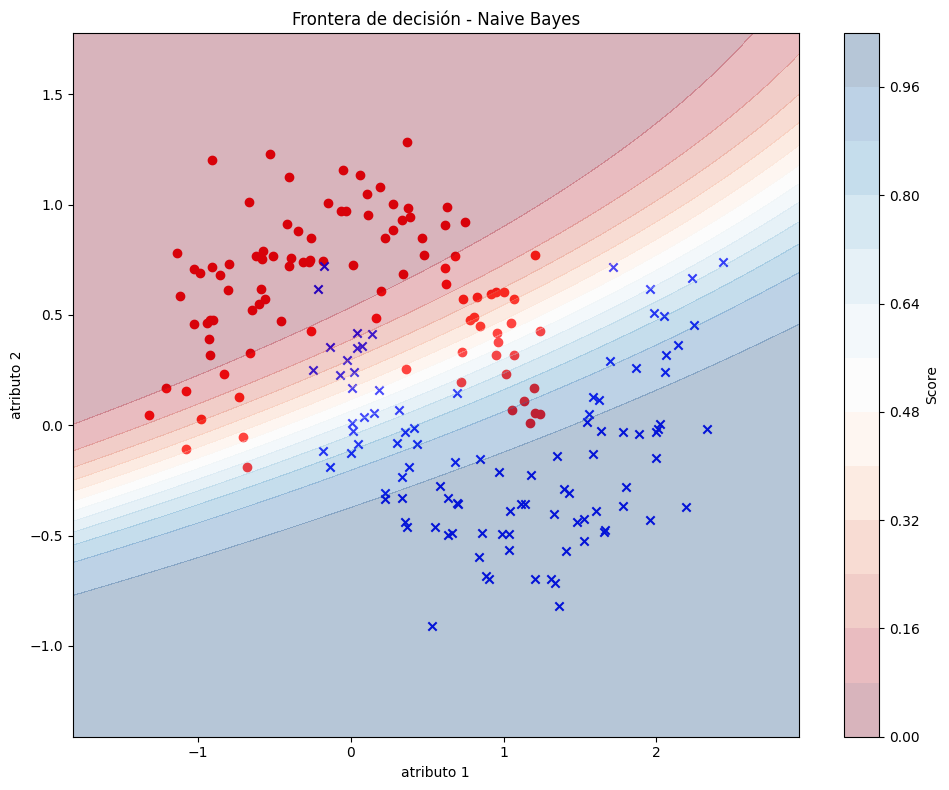

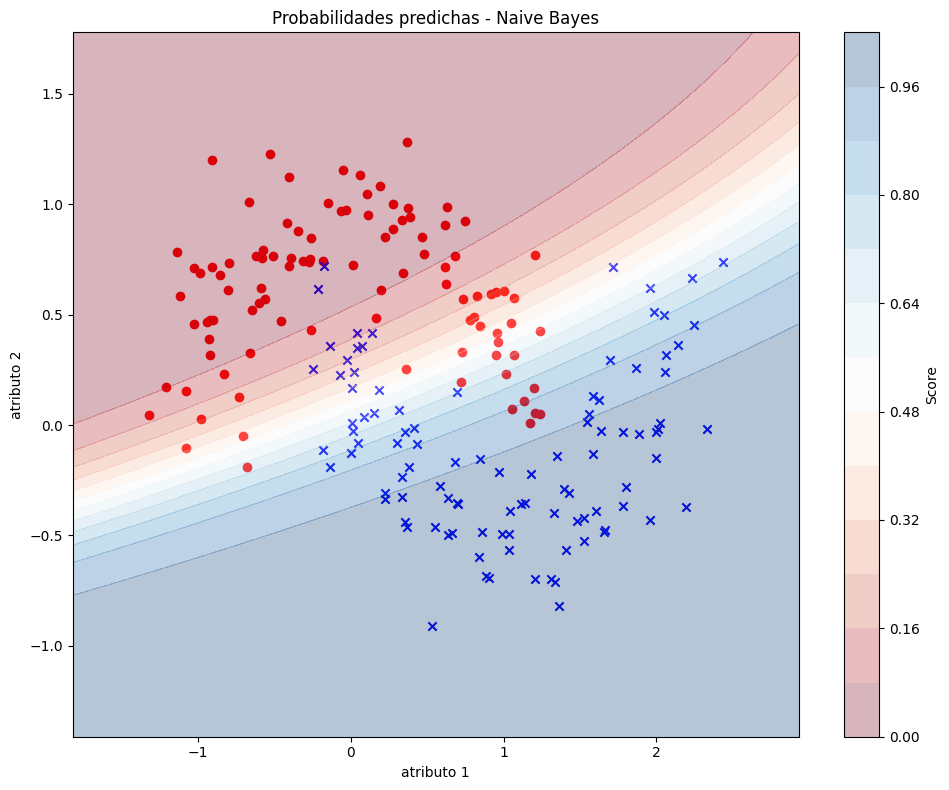

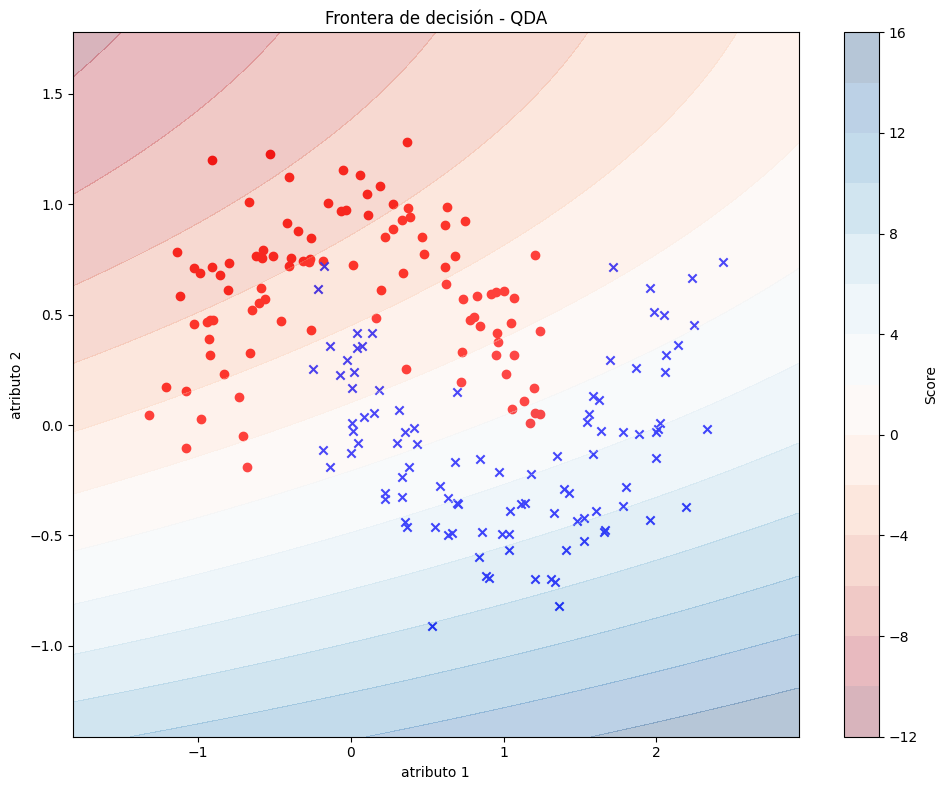

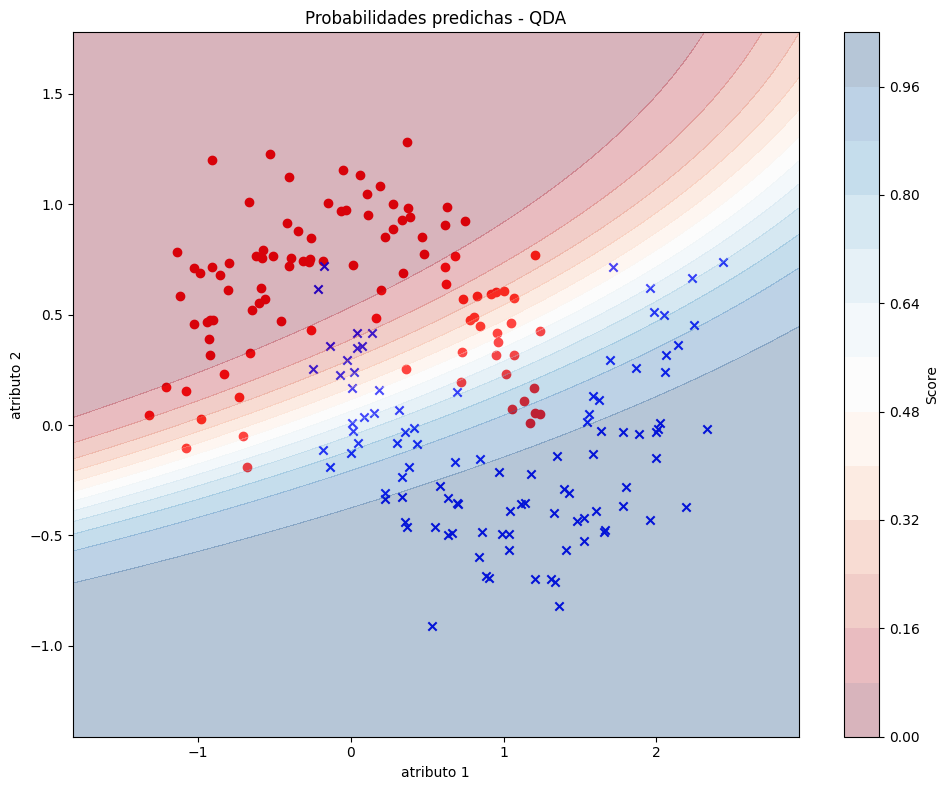

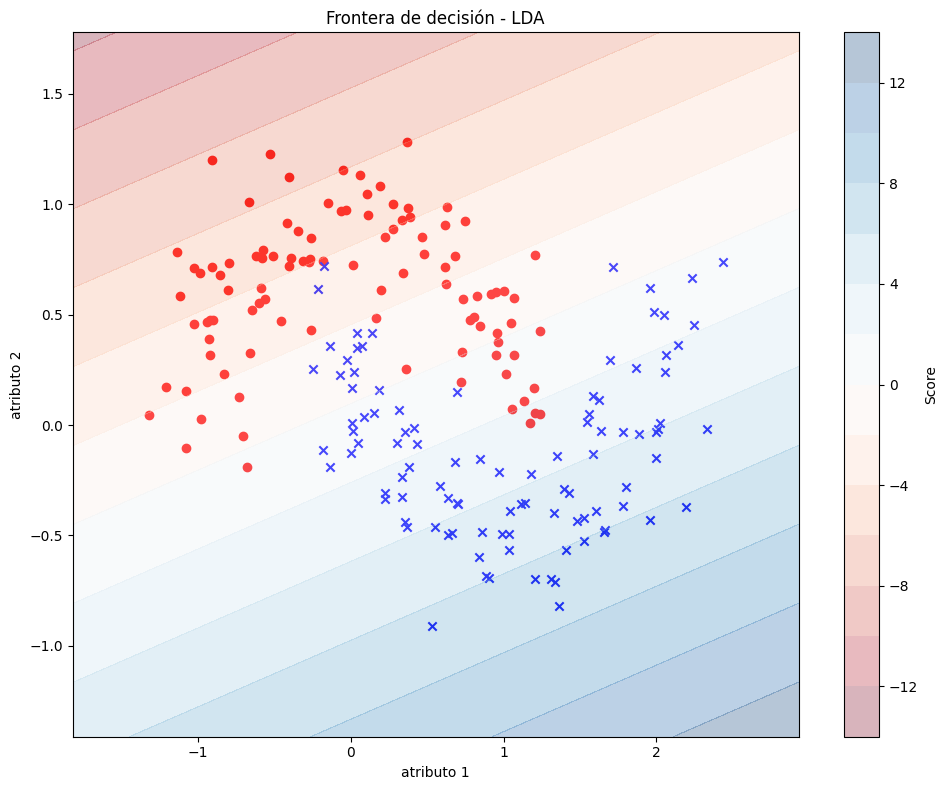

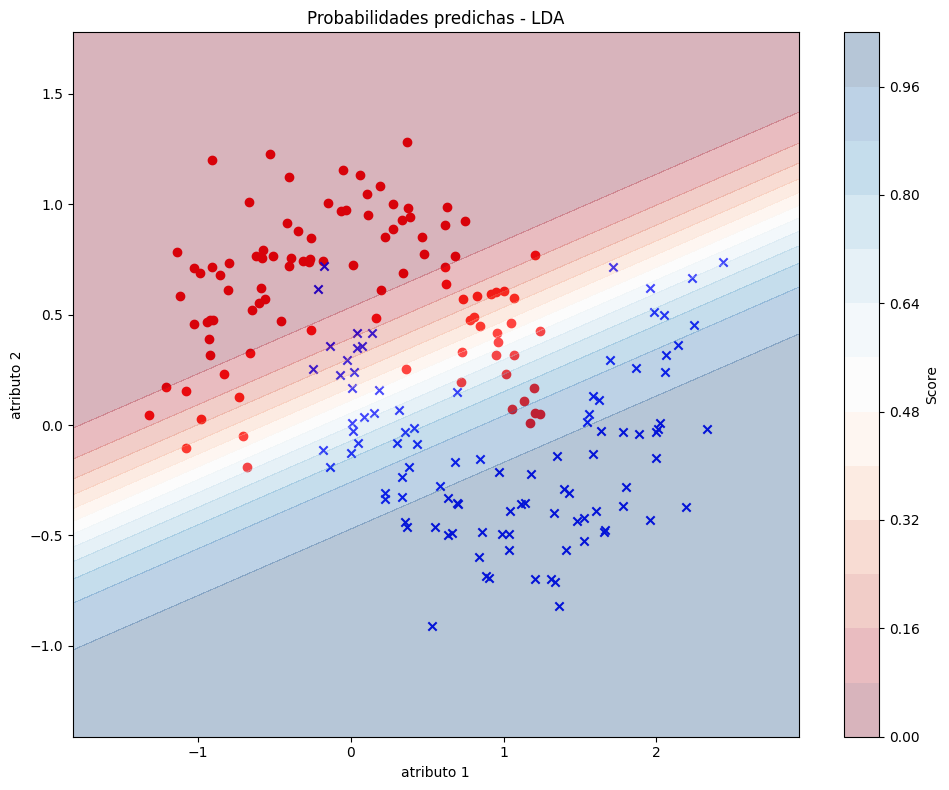

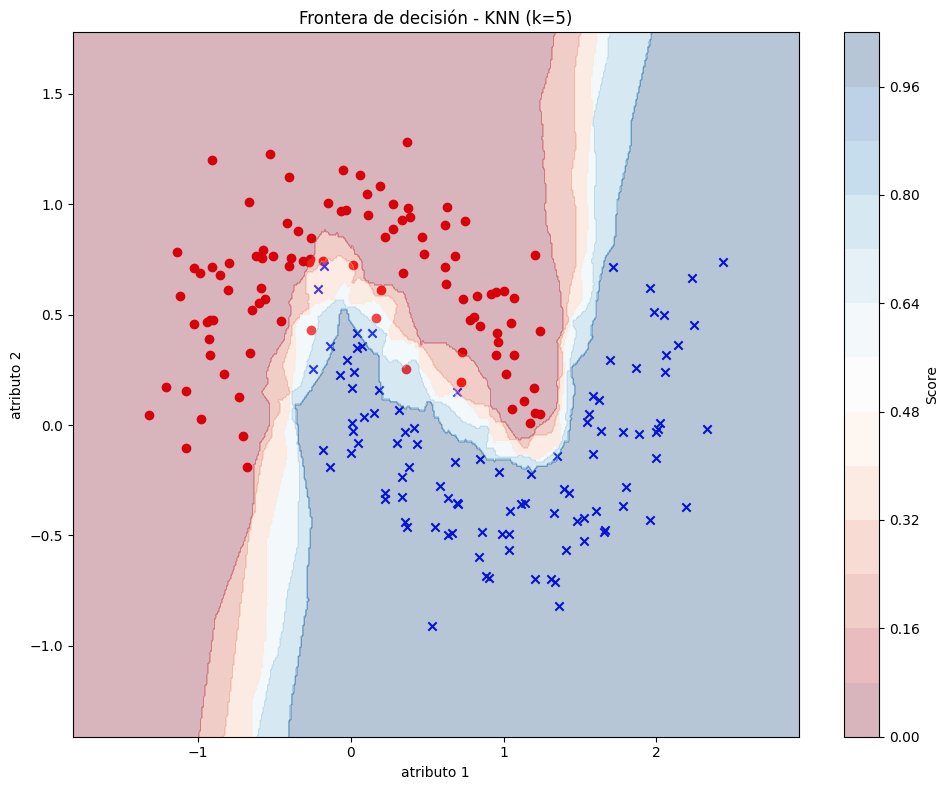

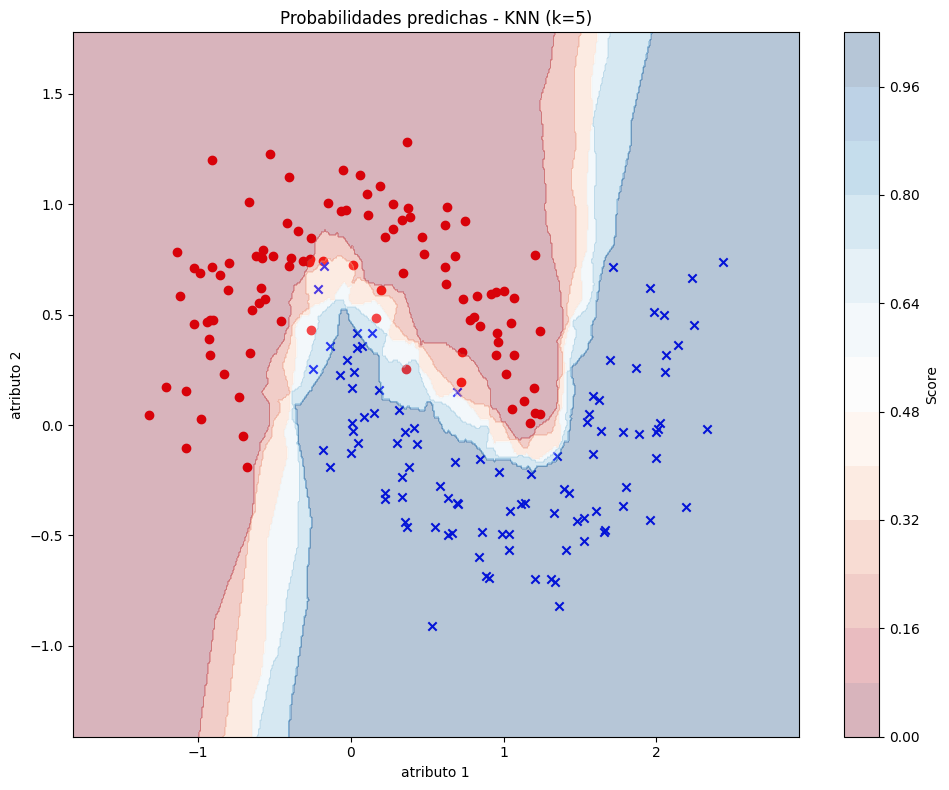

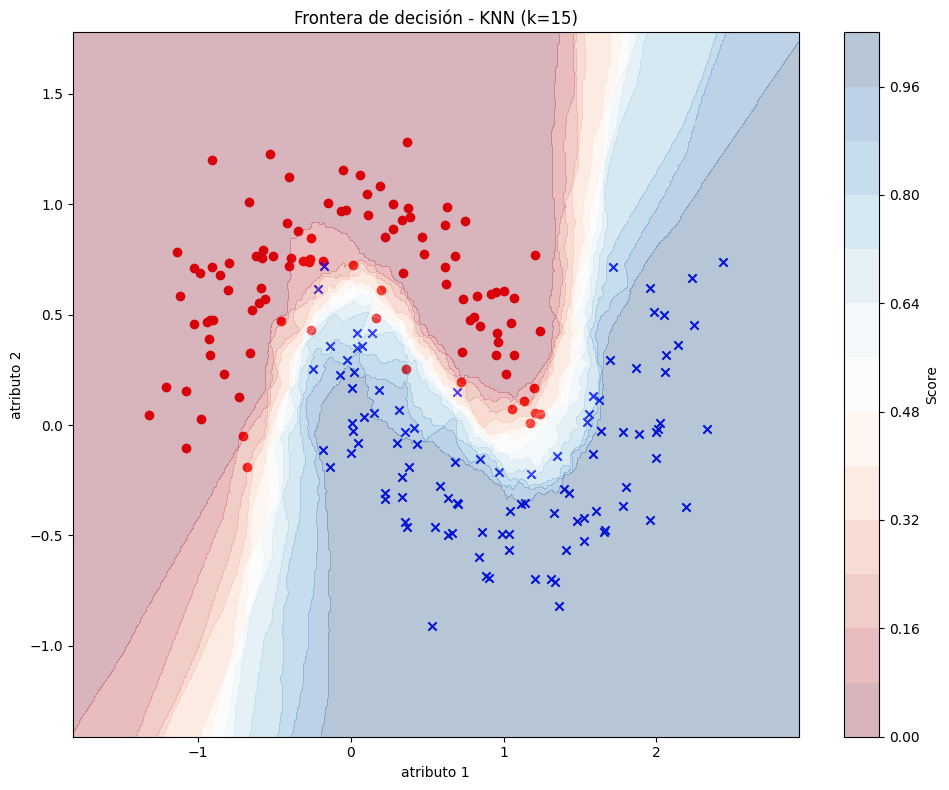

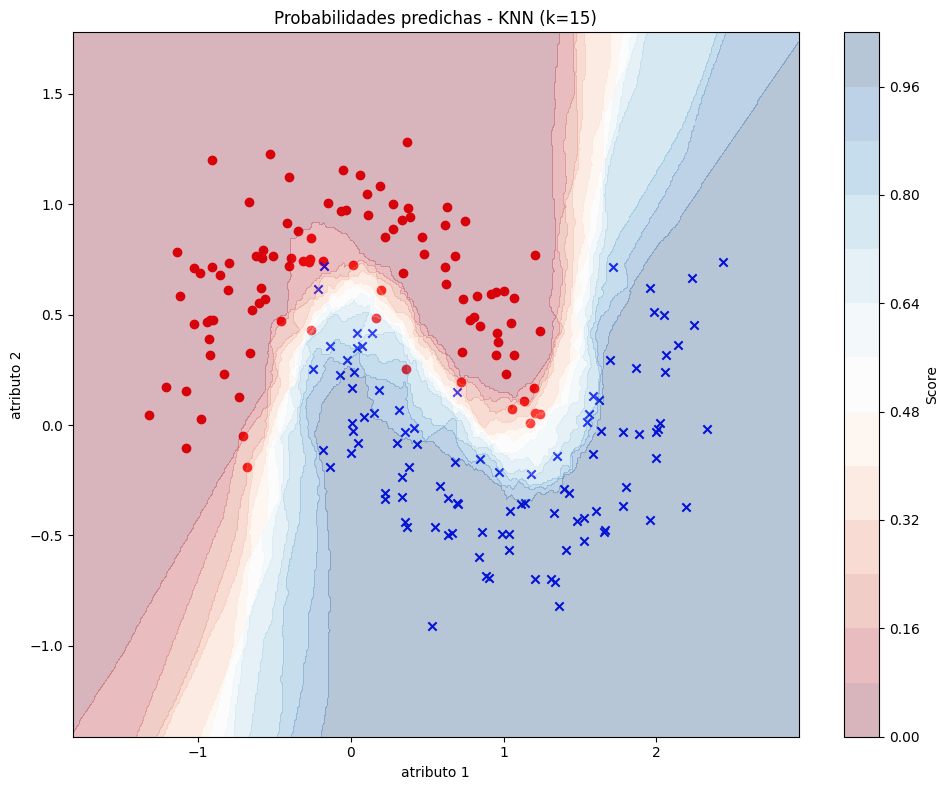

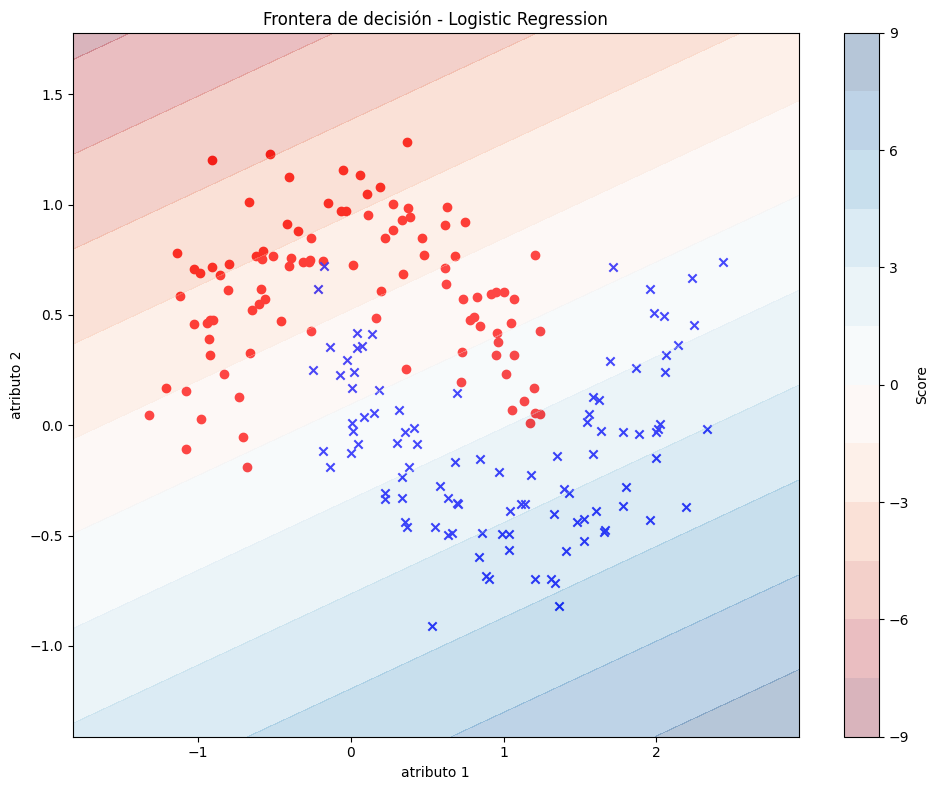

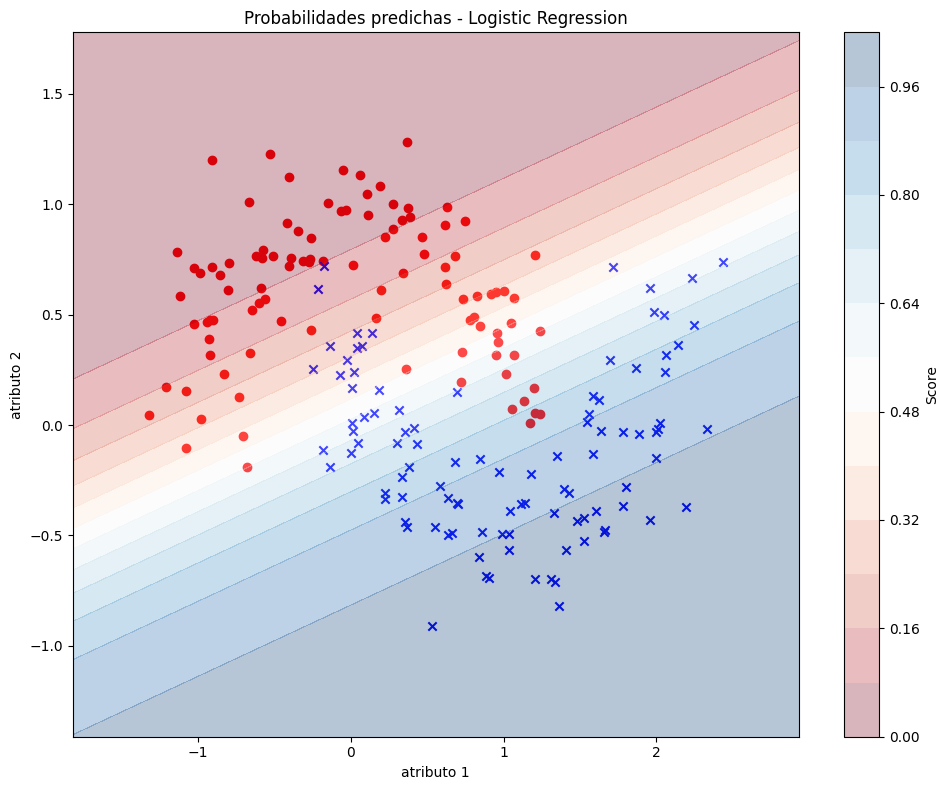

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Función para graficar frontera de decisión
def my_plot_biclassifier(model, X, y, levels=15, h=0.01, score_type="decision_function", title=""): 
    plt.figure(figsize=(10, 8))
    plt.scatter(X[(y==-1).ravel(),0], X[(y==-1).ravel(),1], c='r', marker='o')
    plt.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1], c='b', marker='x')
    plt.xlabel('atributo 1')
    plt.ylabel('atributo 2')
    plt.title(title)

    # Rangos de análisis
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Evaluar decision function o predict proba del modelo
    if score_type == "predict_proba":
        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        else:
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        if hasattr(model, "decision_function"):
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    # Graficar resultado en color
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=levels, cmap=plt.cm.RdBu, alpha=0.3)
    plt.colorbar(label='Score')
    plt.tight_layout()
    plt.show()

# Generar datos half moons
N = 200
X, y = make_moons(N, noise=0.2)
y[y==0] = -1  # Ajustar etiquetas a -1 y 1

# Lista de clasificadores a comparar
classifiers = {
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=15)': KNeighborsClassifier(n_neighbors=15),
    'Logistic Regression': LogisticRegression()
}

# Entrenar y visualizar cada clasificador
for name, clf in classifiers.items():
    clf.fit(X, y)
    my_plot_biclassifier(clf, X, y, title=f'Frontera de decisión - {name}')
    my_plot_biclassifier(clf, X, y, score_type='predict_proba', 
                        title=f'Probabilidades predichas - {name}')

## Discucion
Los clasificadores lineales (LDA y Regresión Logística) tienen un rendimiento pobre debido a la naturaleza no lineal del problema.
KNN muestra el mejor rendimiento general, especialmente con k=5, ya que puede adaptarse a la forma no lineal de los datos.
QDA ofrece un compromiso entre flexibilidad y suavidad, pero no puede capturar completamente la estructura de media luna.
La elección del clasificador depende de:

La naturaleza del problema (lineal vs no lineal)
La cantidad de ruido en los datos
La cantidad de datos de entrenamiento disponibles
Los requisitos de interpretabilidad y velocidad de predicción



Para este conjunto de datos específico, KNN sería la mejor elección, con el valor de k seleccionado mediante validación cruzada para equilibrar el compromiso entre sesgo y varianza.